
# TASK 2 (Data analysis)

### In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform Exploratory Data Analysis (EDA), data pre-processing, statistics-based data analysis, data visualisation and use unsupervised machine learning algorithms (e.g., clustering).

### Business Analytical Question:  What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?



<a id = "table-of-content"></a>
# Table of Content

- [Business Understanding](#business_undestanding)
- [Data Understanding](#data_undestanding)
- [Data Preparation](#data_preparation)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)

[link text](https:// [link text](https://))<a id = "business_undestanding"></a>
# Business Understanding
What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?

<a id = "data_understanding"></a>
# Data Understanding
Here we will look at the data and hopefully find interesting patterns in it.

We will try and see if the columns below have a strong correlation to the *price*:

* name - Looks like a description
* neighbourhood_group
* neighbourhood 
* latitude 
* longitude 
* room_type 
* price
* minimum_nights 
* number_of_reviews 
* last_review
* reviews_per_month 
* calculated_host_listings_count
* availability_365


In [1]:
#import pandas and numpy for data preprocessing and manipulation

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
%matplotlib inline
# Set the aesthetics for the plots
sns.set(style="whitegrid")

#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [2]:
# mounting google drive and loading csv file into dataframe
# folder_path = '/content/drive/MyDrive/TeamProject/AB_NYC_2019.csv'
#folder_path = '/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'

# from google.colab import drive
# drive.mount('/content/drive')

#df = pd.read_csv(folder_path)
df = pd.read_csv('AB_NYC_2019.csv')
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [3]:
#inspect data
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
#number of rows and columns
df.shape

(48895, 16)

In [5]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Numerical columns

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


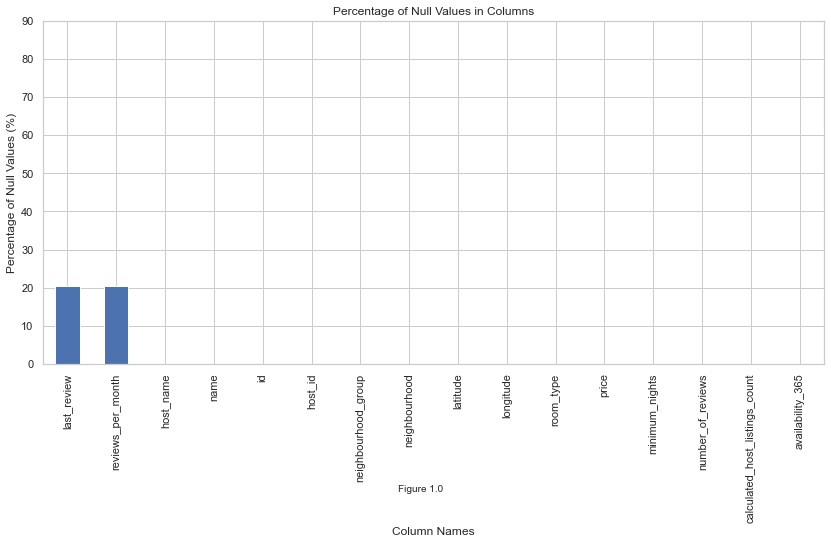

In [8]:
# Calculate the percentage of null values for each column
total_rows = len(df)
null_counts = df.isnull().sum()

# Sort the columns in descending order of null value counts
sorted_null_counts = null_counts.sort_values(ascending=False)

# Select top 20 columns
top_20_null_counts = sorted_null_counts.head(20)

# Calculate percentage for these top 20 columns
top_20_null_percentage = (top_20_null_counts / total_rows) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
top_20_null_percentage.plot(kind='bar')
ax.set_title('Percentage of Null Values in Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_xlabel('Column Names')
ax.set_yticks(np.arange(0, 100, 10))
#Add caption
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make space for the caption
fig.text(0.5, -0.05, "Figure 1.0", ha='center', va='center', fontsize=10, wrap=True)
plt.show()

In [9]:
# Handling missing values
df['name'].fillna('Unknown', inplace=True) #replace missing names with 'unknown'
df['host_name'].fillna('Unknown', inplace=True) #replace missing host names with 'unknown'
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Convert to datetime
df['last_review'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Placeholder for no reviews
df['reviews_per_month'].fillna(0, inplace=True)  # Replacing no reviews with 0


In [10]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


<AxesSubplot:>

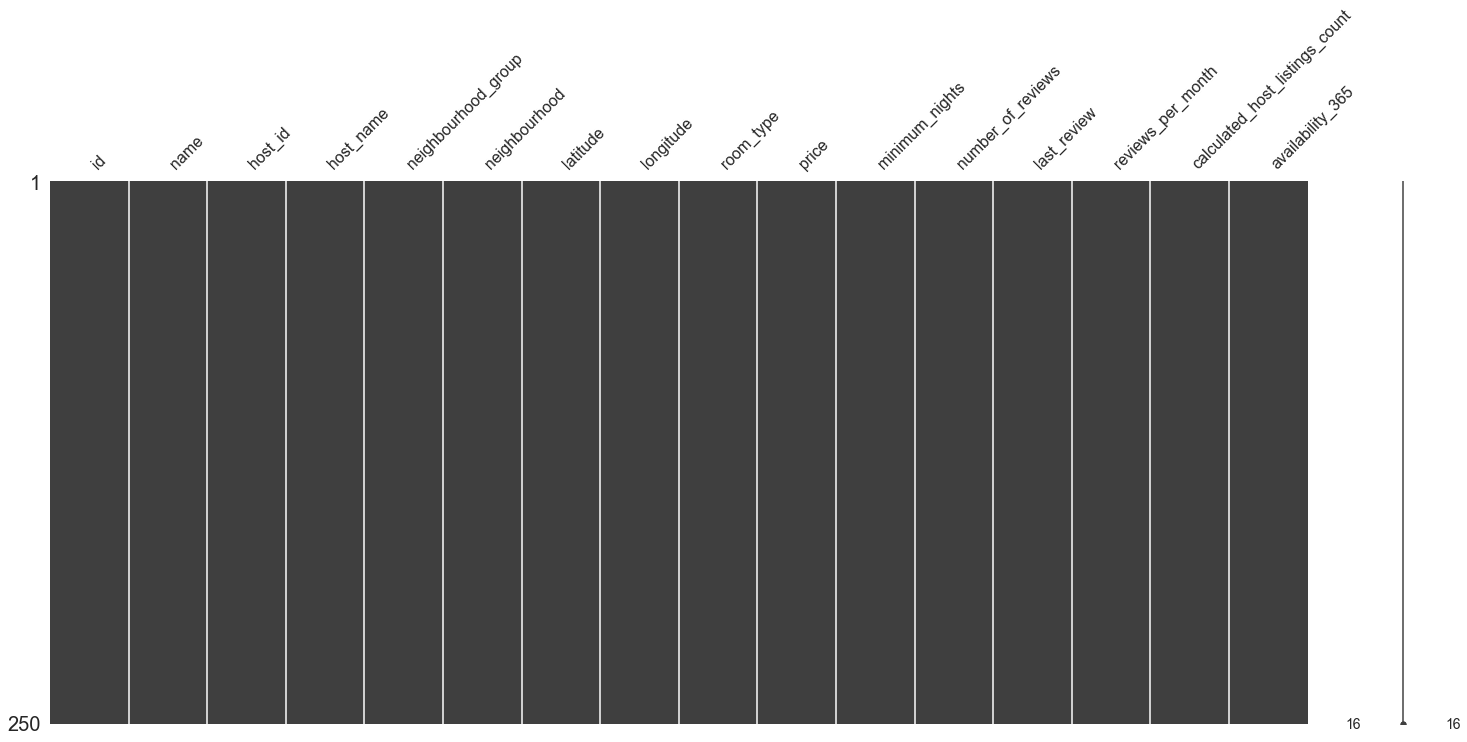

In [11]:
msno.matrix(df.sample(250))

C:\Users\Hamid\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Hamid\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

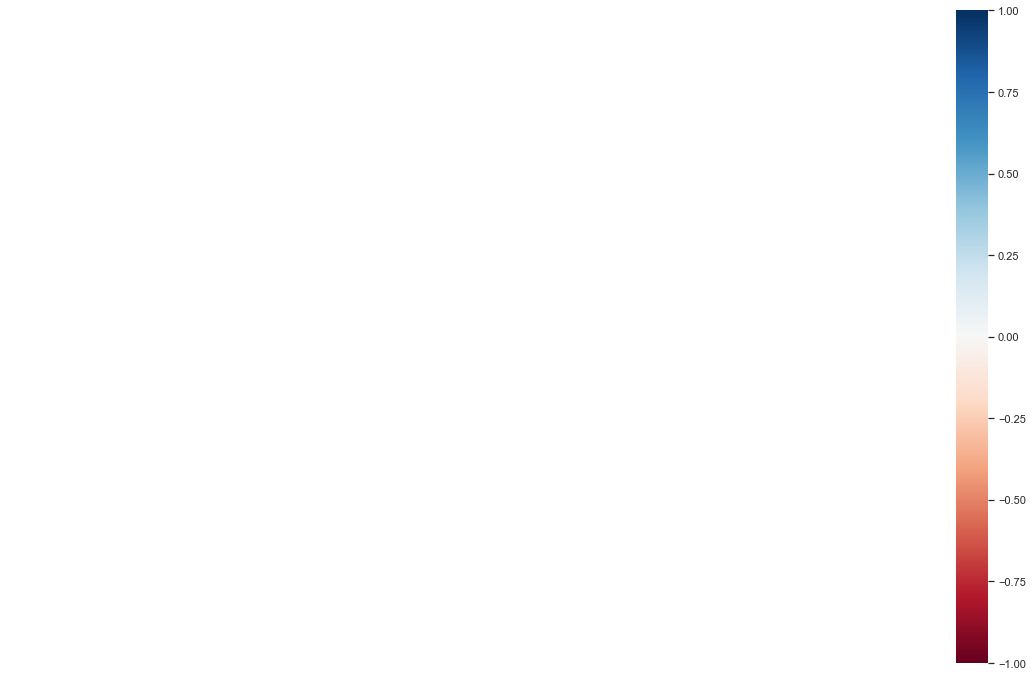

In [12]:
msno.heatmap(df)

## Univariate Analysis

### Price
Looks like we have some prices that are 0. It does not make sense why prices for a listing should be zero so imputing might be necessary.
If imputing is required then I propose using an unsupervised imputing like KNN.

In [13]:
df[df['price'] <= 0].size

176

In [14]:
df[df['price'] <= 0].sort_values(by='price', ascending=True)

id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
26259        Qiuchi           Manhattan         Murray Hill  40.75091   
26841        Sergii            Brooklyn            Bushwick  40.69211   
26866        Sergii            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259  1900-01-01               0.00                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [15]:
# Drop rows where the price is 0
df = df[df['price'] != 0]


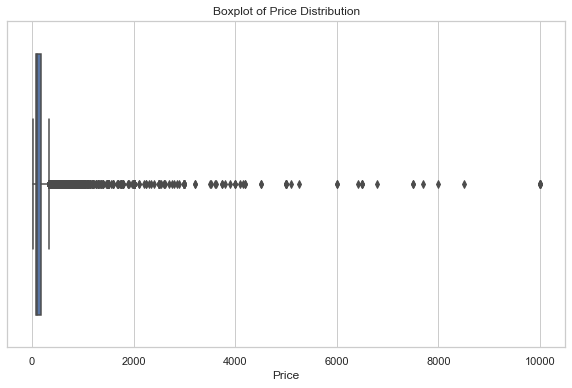

In [16]:
#Distribution of Prices,
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price Distribution')
plt.xlabel('Price')
plt.show()

In [17]:
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.show()

In [18]:
df['normalised_price'] = np.log(df['price'])
# Create a boxplot for the price distribution
# plt.figure(figsize=(10, 6))
# plt.hist(df['normalised_price'], bins=10)
# plt.title('Histogram of Normalized Price Distribution')
# plt.xlabel('Normalised Price')
# plt.show()
df['normalised_price'].min()

2.302585092994046

### Room Types

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [20]:
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
print("Numerical Columns:" + str(numeric_df.columns))

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=[np.object])
print("Categorical Columns:" + str(categorical_df.columns))

Numerical Columns:Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'normalised_price'],
      dtype='object')
Categorical Columns:Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


C:\Users\Hamid\AppData\Local\Temp/ipykernel_16152/998166240.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include=[np.object])


Text(0.5, 1.0, ' Numeric Correlation Matrix')

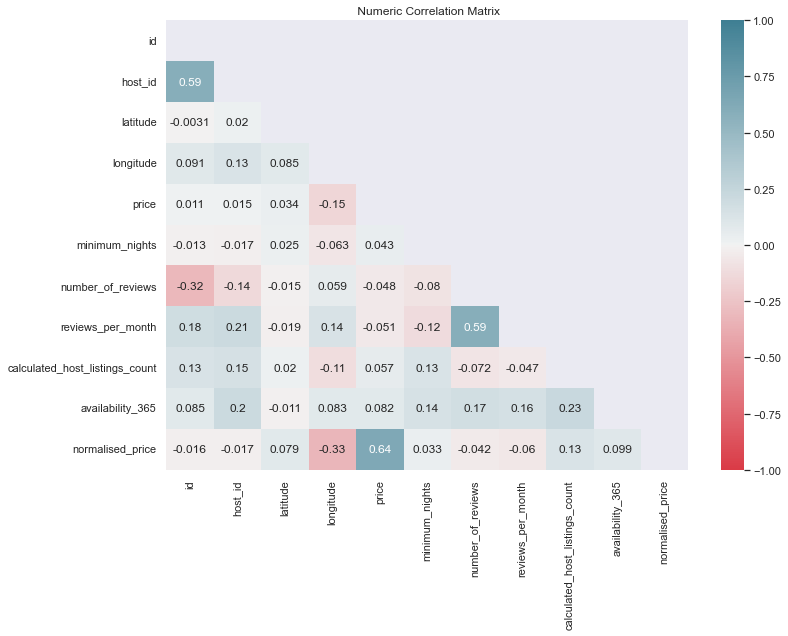

In [21]:
#Correlation Heatmap between numerical columns
numeric_corr = numeric_df.corr()
# Create colormap 
cmap = sns.diverging_palette(10, 220,as_cmap=True)
#Create mask to hide repeated data
mask = np.zeros_like(numeric_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot matrix  with annotations
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(numeric_corr, xticklabels=numeric_df.columns, mask=mask, cmap=cmap, yticklabels=numeric_df.columns, annot=True, vmin=-1, vmax=1)
plt.title(' Numeric Correlation Matrix')

<AxesSubplot:xlabel='room_type', ylabel='count'>

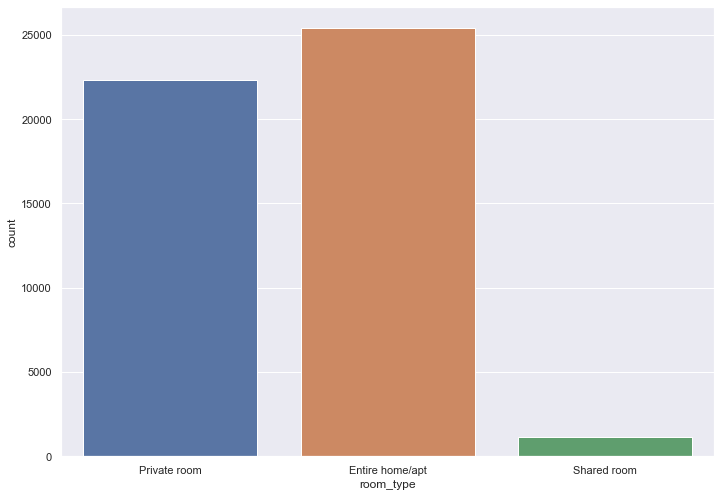

In [22]:
#Counts of different room types
sns.countplot(x="room_type", data=df)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

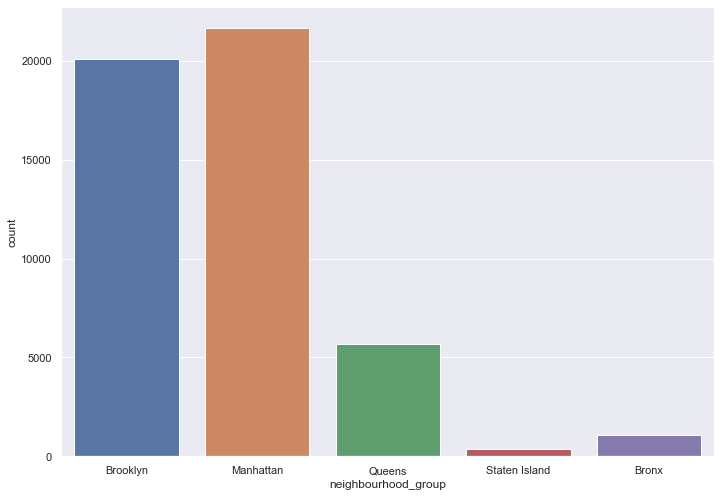

In [23]:
#counts of neighbourhood groups
sns.countplot(x="neighbourhood_group", data=df)

In [24]:
#Price Distribution Across Neighbour hood group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution Across Neigbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

In [25]:
# Bin the 'availability_365' variable
bins = [0, 50, 100, 150, 200, 250, 300, 365]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-365']

df['availability_bin'] = pd.cut(df['availability_365'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='availability_bin', y='price', data=df)
plt.title('Boxplot of Price by Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()

In [26]:
# Count number of rows with price over a 1000
count_high_price = df[df['price'] > 1000].shape[0]

print(f'The number of entries with a price over $1000 is: {count_high_price}')

The number of entries with a price over $1000 is: 239


# Hamid Edits

In [27]:
#Feature engineering, adding a column that calculates distance from central park.

from geopy.distance import great_circle

# Central Park coordinates
central_park_coordinates = (40.7812, -73.9665)

# Function to calculate distance to Central Park
def calculate_distance(row):
    accommodation_coordinates = (row['latitude'], row['longitude'])
    return great_circle(central_park_coordinates, accommodation_coordinates).km

# Apply the function to each row in the DataFrame
df['distance_to_central_park'] = df.apply(calculate_distance, axis=1)

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


C:\Users\Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


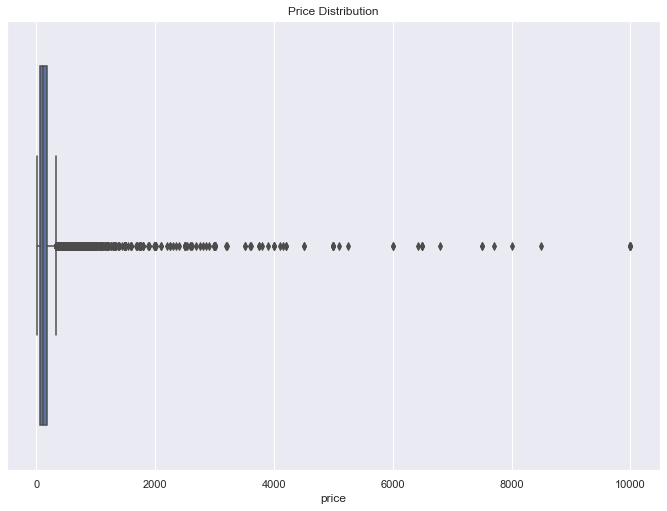

In [28]:
# Statistical summary of the price
price_summary = df['price'].describe()
print(price_summary)

# Boxplot to view the distribution of prices
sns.boxplot(df['price'])
plt.title('Price Distribution')
plt.show()


In [29]:
# Count the number of listings with a price over $2000
high_price_count = df[df['price'] > 2000].shape[0]

print(f"Number of listings with price over $2000: {high_price_count}")


Number of listings with price over $2000: 86


In [30]:
# Cap the prices at $2000
df['capped_price'] = df['price'].clip(upper=2000)

# Check the maximum price to confirm capping
print(df['capped_price'].max())


2000


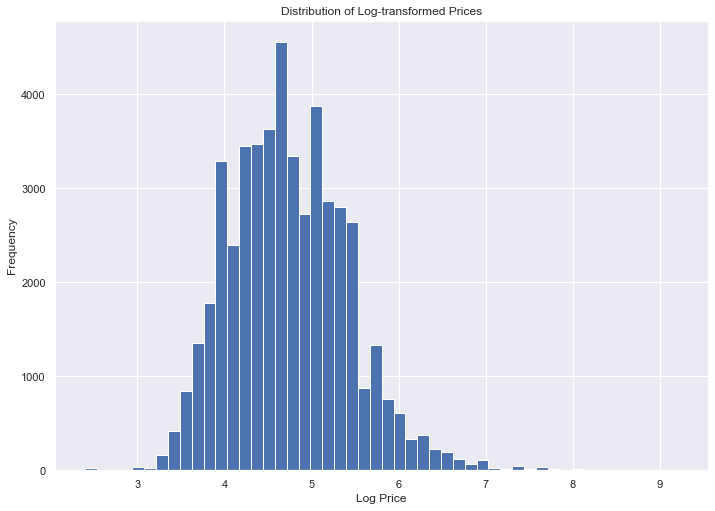

In [31]:
# Add a small constant to price to avoid log(0)
df['log_price'] = np.log(df['price'] + 1)

# Check the distribution of the log-transformed prices
df['log_price'].hist(bins=50)
plt.title('Distribution of Log-transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

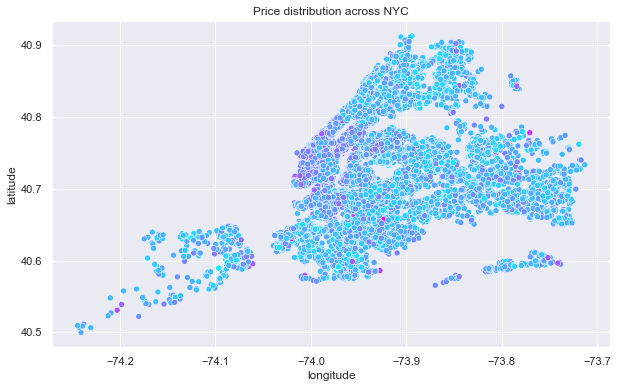

In [32]:
# Scatter plot of price vs. latitude and longitude to show distribution of prices across NYC
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['log_price'], palette='cool', legend=False)
plt.title('Price distribution across NYC')
plt.show()

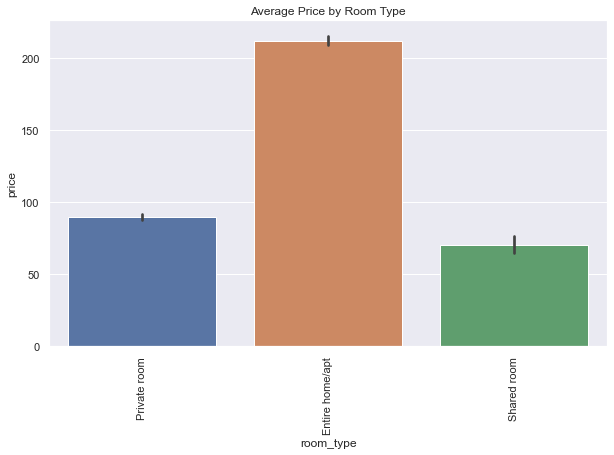

In [33]:
# Bar plot of average price by property type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Room Type')
plt.show()

In [34]:
# Line plot of price vs. number of reviews
plt.figure(figsize=(10, 6))
sns.lineplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs. Number of Reviews')
plt.show()

In [35]:
# Average price by neighbourhood group
neighbourhood_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print(neighbourhood_prices)

# Average price by room type
property_type_prices = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print(property_type_prices)


neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438915
Staten Island    114.812332
Queens            99.517649
Bronx             87.577064
Name: price, dtype: float64
room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64


In [36]:
# Calculate average price by neighbourhood group
neighbourhood_group_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
neighbourhood_group_prices.plot(kind='barh', color='skyblue')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood Group')
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# One-hot encode 'neighbourhood_group' and 'room_type'
neighbourhood_encoded = pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood')
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')

# Concatenate the encoded dataframes with the original dataframe
df_encoded = pd.concat([df, neighbourhood_encoded, room_type_encoded], axis=1)

# Select features for clustering from the encoded DataFrame
feature_columns = ['latitude', 'longitude', 'log_price', 'number_of_reviews', 
                   'distance_to_central_park'] + list(neighbourhood_encoded.columns) + list(room_type_encoded.columns)

features = df_encoded[feature_columns]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the scaled features
print(features_scaled[:5])  # print the first 5 rows


[[-1.49387249 -0.43750391  0.39418128 -0.32035265  1.45158479 -0.15101725
   1.19693147 -0.89197618 -0.36208118 -0.08768682 -1.04029232  1.0909819
  -0.15576747]
 [ 0.45235227 -0.68448025  0.98671473  0.48771229 -0.9967421  -0.15101725
  -0.83546972  1.12110617 -0.36208118 -0.08768682  0.96126827 -0.91660549
  -0.15576747]
 [ 1.46828415  0.22261619  0.40378635 -0.52236889 -0.92670662 -0.15101725
  -0.83546972  1.12110617 -0.36208118 -0.08768682 -1.04029232  1.0909819
  -0.15576747]
 [-0.80344224 -0.16431341 -0.34424634  5.53811816  0.5603508  -0.15101725
   1.19693147 -0.89197618 -0.36208118 -0.08768682  0.96126827 -0.91660549
  -0.15576747]
 [ 1.27555051  0.1773372  -0.49655099 -0.32035265 -1.1445213  -0.15101725
  -0.83546972  1.12110617 -0.36208118 -0.08768682  0.96126827 -0.91660549
  -0.15576747]]


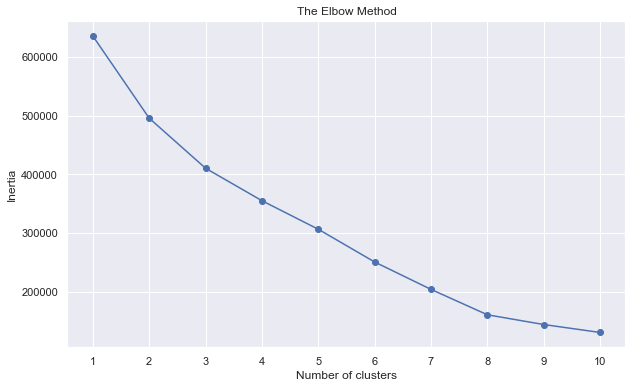

In [38]:
# Range of potential clusters
cluster_range = range(1, 11)  # For example, from 1 to 10 clusters

# Calculate inertia for each number of clusters
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)  # 'features_scaled' from your previous preprocessing
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()


In [39]:
# Define the k-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the algorithm to the scaled data
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
df_encoded['cluster'] = kmeans.labels_


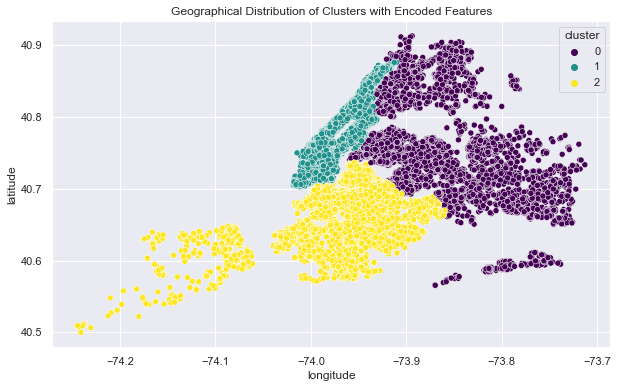

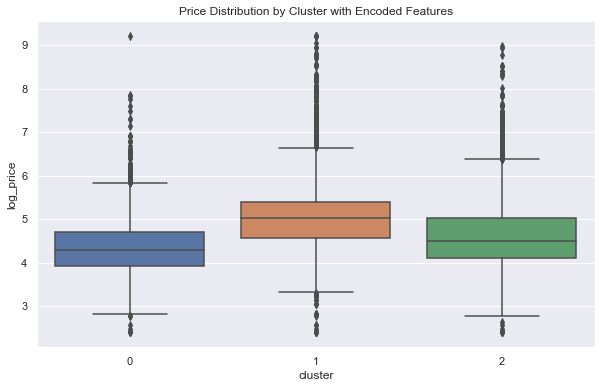

In [41]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['longitude'], y=df_encoded['latitude'], hue=df_encoded['cluster'], palette='viridis')
plt.title('Geographical Distribution of Clusters with Encoded Features')
plt.show()

# Boxplot for price distribution in each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='log_price', data=df_encoded)
plt.title('Price Distribution by Cluster with Encoded Features')
plt.show()